In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
print("Please upload the parkinsons.data file")
uploaded = files.upload()

Please upload the parkinsons.data file


Saving parkinsons.data to parkinsons (3).data


In [9]:
# Load and analyze data
parkinsons_data = pd.read_csv('parkinsons.data')
print("\nDataset shape:", parkinsons_data.shape)
print("\nClass distribution:")
print(parkinsons_data['status'].value_counts())


Dataset shape: (195, 24)

Class distribution:
status
1    147
0     48
Name: count, dtype: int64


In [10]:
# Prepare data
X = parkinsons_data.drop(columns=['name','status'], axis=1)
y = parkinsons_data['status']

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [13]:
# Calculate metrics
train_accuracy = accuracy_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)

test_accuracy = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)

In [14]:
# Print results in simple format
print("\nTraining Data Evaluation:")
print("Accuracy:  {:.4f}".format(train_accuracy))
print("F1-Score:  {:.4f}".format(train_f1))
print("Recall:    {:.4f}".format(train_recall))

print("\nTest Data Evaluation:")
print("Accuracy:  {:.4f}".format(test_accuracy))
print("F1-Score:  {:.4f}".format(test_f1))
print("Recall:    {:.4f}".format(test_recall))


Training Data Evaluation:
Accuracy:  0.9044
F1-Score:  0.9378
Recall:    0.9800

Test Data Evaluation:
Accuracy:  0.7966
F1-Score:  0.8750
Recall:    0.8936


<Figure size 1200x600 with 0 Axes>

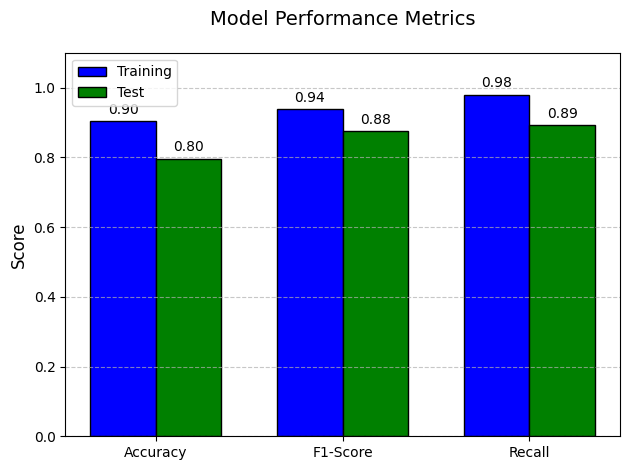


Sample Prediction:
Prediction: Parkinsons negative


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
# Visualization
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'F1-Score', 'Recall']
train_scores = [train_accuracy, train_f1, train_recall]
test_scores = [test_accuracy, test_f1, test_recall]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
train_bars = ax.bar(x - width/2, train_scores, width, label='Training', color='blue', edgecolor='black')
test_bars = ax.bar(x + width/2, test_scores, width, label='Test', color='green', edgecolor='black')

ax.set_title('Model Performance Metrics', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=12)
ax.legend()

# Add value labels on bars
for bars in [train_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Prediction example
sample_data = (136.92600, 159.86600, 131.27600, 0.00293, 0.00002, 0.00118, 0.00153,
               0.00355, 0.01259, 0.11200, 0.00656, 0.00717, 0.01140, 0.01968, 0.00581,
               25.70300, 0.460600, 0.646846, -6.547148, 0.152813, 2.041277, 0.138512)

sample_array = np.asarray(sample_data).reshape(1, -1)
sample_scaled = scaler.transform(sample_array)
prediction = model.predict(sample_scaled)[0]

print("\nSample Prediction:")
print("Prediction:", "Parkinsons positive" if prediction == 1 else "Parkinsons negative")